In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext google.colab.data_table

In [2]:
#reading url
url = 'https://raw.githubusercontent.com/Miriam-Alfred/Winc_Python/main/attacks.csv'
df = pd.read_csv(url, encoding='latin-1')


In [ ]:
df.info()

In [ ]:
#exploring and cleaning the df
#dropping column after Investigator or Source_ the rest is irrelevant for the report
df_clean = df.loc[:, :'Investigator or Source']
df_clean

In [ ]:
case_number = df_clean['Case Number'].value_counts()
print(case_number)

In [ ]:
# removing all rows that has NaN, 0 or xx.. because all other rows are Nan as well
df_clean = df_clean.dropna(subset=['Case Number'])
df_clean = df_clean[df_clean['Case Number'] != '0']
df_clean = df_clean[df_clean['Case Number'] != 'xx']
df_clean

In [ ]:
# while checking case_number count, there are cases with same number twice so I want to see if these rows are duplicates or not
duplicates = df_clean[df_clean.duplicated()]
print(duplicates)
#results: empty dataframe which means no duplicates_ I assume that each case number should be unique but because I cant ask the data owner which record is correct, will leave both of the records for this analyse.

In [ ]:
print(df_clean.columns.tolist())

In [9]:
# renaming few columns
new_names = {'Sex ': 'Sex', 'Fatal (Y/N)': 'Fatal', 'Species ': 'Species'}
df_clean = df_clean.rename(columns=new_names)

In [ ]:
# UNIQUE VALUES
  # was trying to find the unique values of the important columns i will need to analyse (from my perspective)
  # but it was also too much unique values so will try another approach by checking the most count of each value_ to check the frequency

def unique_values_per_column(dataframe,columns_ToCheck):
    unique_values_lists = []

    for column in columns_ToCheck:
        unique_values = dataframe[column].unique().tolist()
        unique_values_lists.append(f"Values in column: {column}")
        unique_values_lists.append(unique_values)
        unique_values_lists.append('')

    return unique_values_lists

df_unique = pd.DataFrame(df_clean)
columns_ToCheck =['Year', 'Type', 'Activity', 'Sex', 'Age', 'Injury', 'Fatal','Species']

result = unique_values_per_column(df_unique, columns_ToCheck)
for values in result:
    print(values)


In [ ]:
# COUNT VALUES

def count_unique_values(dataframe, column_name):
    counts = dataframe[column_name].value_counts()
    return counts

df_count = pd.DataFrame(df_clean)

column_toCount = 'Activity' #['Year', 'Type', 'Activity', 'Sex', 'Age', 'Injury', 'Fatal', 'Species']

result = count_unique_values(df, column_toCount)
print(result.nlargest(15)) #added nlargest to see the top results.

In [12]:
#cleaning_dataframe
#1 Year
df_clean.dtypes
df_clean['Year'].replace([np.nan, np.inf], -1, inplace=True)
df_clean['Year'] = df_clean['Year'].astype(int)

year_replace = [-1, 0]
df_clean['Year'].replace(year_replace, np.nan, inplace=True)

In [19]:
#2 Type
#changed Sea disaster as provoked to limit the options
df_clean['Type'].replace(['Sea Disaster'],['Provoked'],inplace=True)

# changed Invalid to NaN because it is considered as not filled in
df_clean['Type'].replace(['Invalid'],[np.NaN],inplace=True)

## I dont understand what they mean by boating/boat so i keep it as it is but will choose later to not include it in the results.

In [ ]:
#3 Species
Species_toChange = ['Shark involvement prior to death was not confirmed', 'Invalid','Shark involvement not confirmed', 'Shark involvement prior to death unconfirmed']
Species_unknown = ['Unknown','Unknown','Unknown','Unknown']
df_clean['Species'].replace(Species_toChange, Species_unknown,inplace=True)
species_unique = df_clean['Species'].value_counts()
print(species_unique.nlargest(10))

In [60]:
#4 Age
# I will exclude rows with non-numeric age values such as 'Young' or 'Teen' from the analysis because these labels are not specific enough to determine the age range they represent.
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')


In [ ]:
#5 Fatal
df_clean['Fatal'] = df_clean['Fatal'].str.strip().str.upper()
valid_values = ['N', 'Y']
df_clean['Fatal'] = df_clean['Fatal'].apply(lambda x: x if x in valid_values else np.NaN)
df_clean['Fatal'] = df_clean['Fatal'].replace({'N': 'No', 'Y': 'Yes'})
fatalCount = df_clean['Fatal'].value_counts()
print(fatalCount)

In [120]:
#6 Activities
df_clean['Activity'] = df_clean['Activity'].apply(lambda x: x if isinstance(x, str) else pd.NA)
df_clean['Activity'] = df_clean['Activity'].str.lower().str.strip()

In [91]:
#Question 1: top species with attack counts
print('What are the most dangerous types of sharks to humans?')
def print_top_species(title, data):
    print(title)
    print(data.nlargest(5))
    print()

# Top species involved in an attack
non_unknown_species = df_clean[df_clean['Species'] != 'Unknown']
print_top_species('Top 5 sharks were involved in an attack', non_unknown_species['Species'].value_counts())

# Top species involved in a fatal attack
Fatal_attack = df_clean[df_clean['Fatal'] == 'Yes']
print_top_species('Top 5 sharks were involved in a provoked attack', Fatal_attack['Species'].value_counts())

## Depending on the definition
# We can conclude that white sharks, tiger sharks, and bull sharks are the most dangerous.

What are the most dangerous types of sharks to humans?
Top 5 sharks were involved in an attack
White shark    163
Tiger shark     73
Bull shark      52
4' shark        40
6' shark        40
Name: Species, dtype: int64

Top 5 sharks were involved in a provoked attack
White shark          44
Tiger shark          25
Bull shark           15
3.7 m [12'] shark     9
3 m [10'] shark       8
Name: Species, dtype: int64



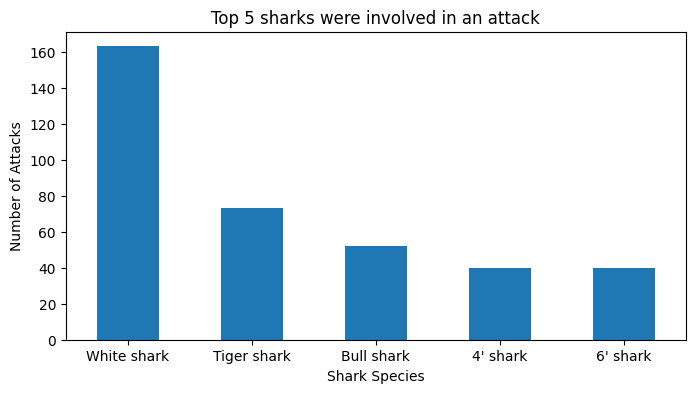

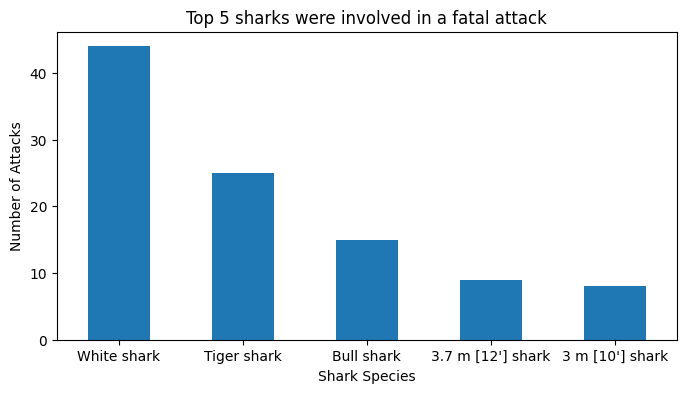

In [93]:
def plot_top_species(title, data):
    plt.figure(figsize=(8, 4))
    data.nlargest(5).plot(kind='bar')
    plt.title(title)
    plt.xlabel('Shark Species')
    plt.ylabel('Number of Attacks')
    plt.xticks(rotation=0)
    plt.show()

plot_top_species('Top 5 sharks were involved in an attack', non_unknown_species['Species'].value_counts())
print(" ")
plot_top_species('Top 5 sharks were involved in a fatal attack', Fatal_attack['Species'].value_counts())

In [ ]:
# Question 2: Are children more likely to be attacked by sharks?

  # To address this question, I began by investigating whether there exists a correlation between age and fatal attacks.
  # I aimed to provide a straightforward 'yes' or 'no' answer to this query. In the first result, there is no significant correlation between age and fatal attacks.

  # In the second result, I further examined the relationship using a scatter plot. The plot allowed me to identify the age groups that experienced the highest count of fatal attacks.
  # This visualization provided a more detailed understanding of the distribution of fatal attacks across different age ranges.

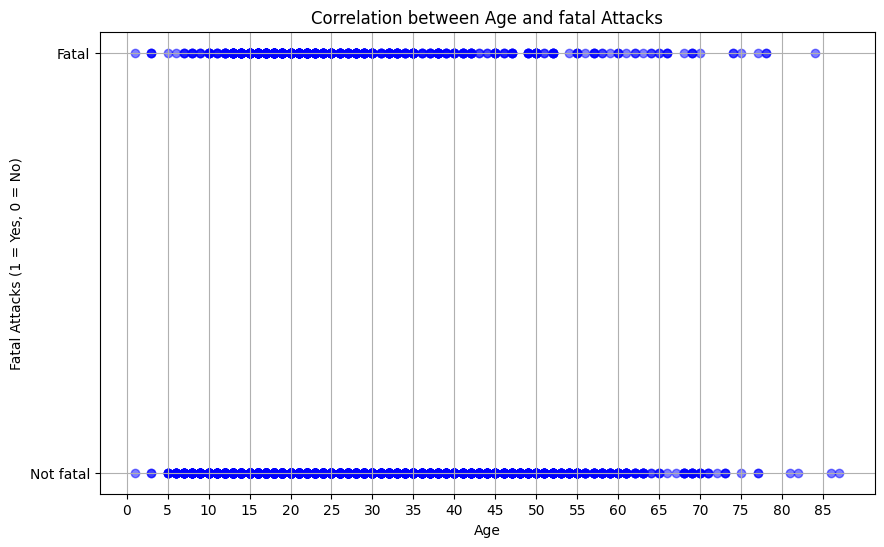

There is no significant correlation between age and fatal attacks.
Age may not be a strong factor in predicting fatal shark attacks.


In [94]:
# Result 1
correlation = df_clean['Age'].corr(df_clean['Fatal'].apply(lambda x: 1 if x == 'Yes' else 0))

plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Age'], df_clean['Fatal'].apply(lambda x: 1 if x == 'Yes' else 0), color='blue', alpha=0.5)
plt.title("Correlation between Age and fatal Attacks")
plt.xlabel("Age")
plt.ylabel("Fatal Attacks (1 = Yes, 0 = No)")
plt.xticks(range(0, int(df_clean['Age'].max()) + 1, 5))
plt.yticks([0, 1], ['Not fatal', 'Fatal'])
plt.grid(True)
plt.show()

if correlation > 0:
    print("There is a positive correlation between age and fatal attacks.")
    print("Children may be more likely to experience fatal shark attacks.")
else:
    print("There is no significant correlation between age and fatal attacks.")
    print("Age may not be a strong factor in predicting fatal shark attacks.")

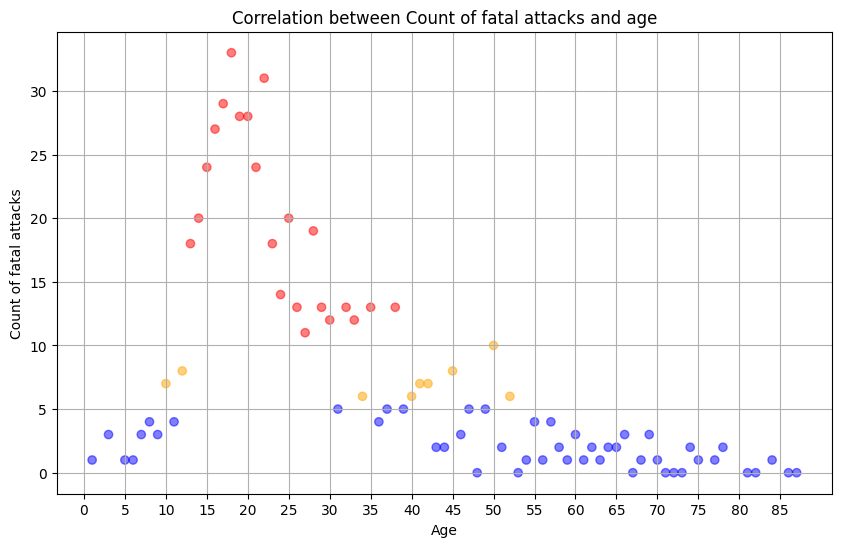

In [99]:
# result 2

# grouping by the age and fatal attack
age_fatal_count = df_clean.groupby('Age')['Fatal'].apply(lambda x: (x == 'Yes').sum()).reset_index()

# To make it more clear, creating for each group a different color
age_fatal_count['Color'] = pd.cut(age_fatal_count['Fatal'], bins=[-1, 5, 10, 15], labels=['low', 'medium', 'high'])
colors = ['blue' if color == 'low' else 'orange' if color == 'medium' else 'red' for color in age_fatal_count['Color']]

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(age_fatal_count['Age'], age_fatal_count['Fatal'], c=colors, alpha=0.5)
plt.title("Correlation between Count of fatal attacks and age")
plt.xlabel("Age")
plt.ylabel("Count of fatal attacks")
plt.xticks(range(0, int(df_clean['Age'].max()) + 1, 5))
plt.grid(True)
plt.show()

In [100]:
# Find the age group with the most common fatal attacks
most_common_age_group = age_fatal_count[age_fatal_count['Fatal'] == age_fatal_count['Fatal'].max()]
age_ranges = {'child': (0, 17), 'young_adult': (18, 30), 'Middle_age': (31, 50),  'Old': (51, 85)}

most_common_age_range = None
for color, (start, end) in age_ranges.items():
    if start <= most_common_age_group['Age'].values[0] <= end:
        most_common_age_range = (start, end)
        break

if most_common_age_range:
    print(f"The age group with the most common fatal attacks is between {most_common_age_range[0]} and {most_common_age_range[1]} years old.")
else:
    print("No specific age range found for the most common age group.")

The age group with the most common fatal attacks is between 18 and 30 years old.


In [ ]:
# To answer question 2: Are children more likely to be attacked by sharks? The answer is no.

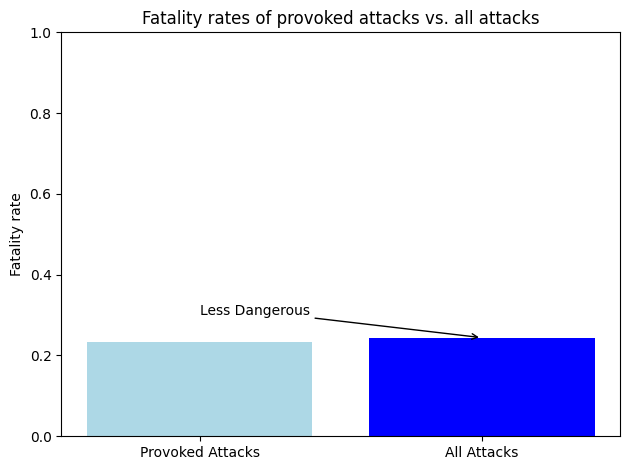

In [115]:
# Question 3: Are shark attacks where sharks were provoked more or less dangerous? --> Answer is Less dangerous

# filtering provoked attacks
provoked_attacks = df_clean[df_clean['Type'] == 'Provoked']

# to compare between fatal attacks that are provoked vs all (in percentage).
fatalRate_provoked = provoked_attacks['Fatal'].value_counts(normalize=True)['Yes']
fatalRate_all = df_clean['Fatal'].value_counts(normalize=True)['Yes']

#choosing bar color
light_blue = '#ADD8E6'

plt.bar(['Provoked Attacks', 'All Attacks'], [fatalRate_provoked, fatalRate_all], color=[light_blue, 'blue'])
plt.title("Fatality rates of provoked attacks vs. all attacks")
plt.ylabel("Fatality rate")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()

if fatalRate_provoked > fatalRate_all:
    plt.annotate("More Dangerous", xy=(0, fatalRate_provoked), xytext=(0.5, 1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
elif fatalRate_provoked < fatalRate_all:
    plt.annotate("Less Dangerous", xy=(1, fatalRate_all), xytext=(0, 0.3),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))
else:
    plt.annotate("Same Fatality Rates", xy=(0.5, fatalRate_all), xytext=(0.2, 0.2),
                 arrowprops=dict(facecolor='black', arrowstyle='->'))

# Show the plot
plt.show()

In [ ]:
# Question 4: Are certain activities more likely to result in a shark attack?
Cleaned_activity = df_clean['Activity'].value_counts()
print(Cleaned_activity.nlargest(15))

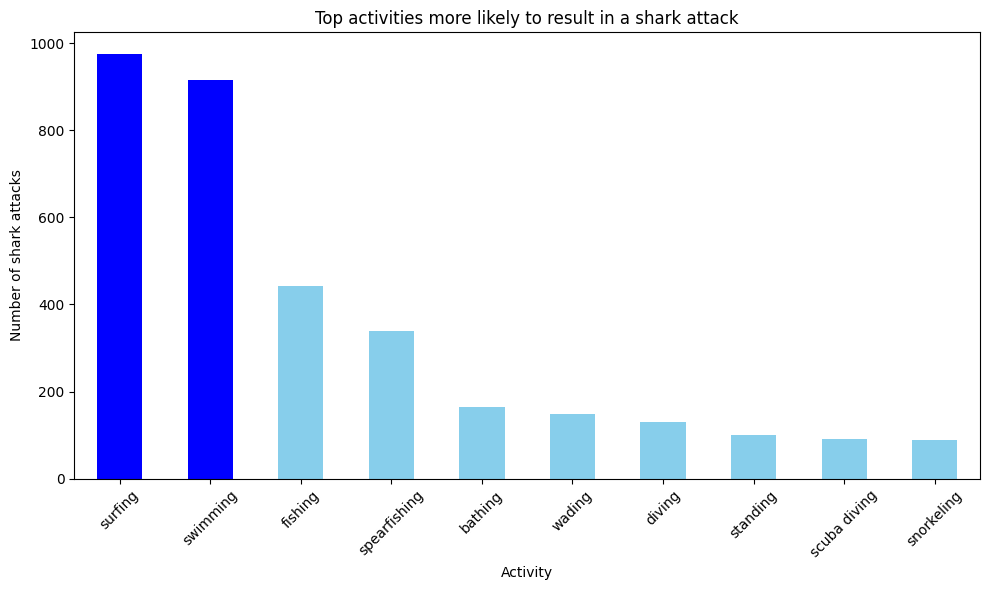

In [135]:
colors = ['blue' if count > 500 else 'skyblue' for count in Cleaned_activity]

plt.figure(figsize=(10, 6))
Cleaned_activity.nlargest(10).plot(kind='bar', color=colors)
plt.title("Top activities more likely to result in a shark attack")
plt.xlabel("Activity")
plt.ylabel("Number of shark attacks")
plt.xticks(rotation=45)
plt.tight_layout()

## as results below, surfing and swimming are top two activities that more likely to result in a shark attack.